In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os

In [182]:
os.listdir()

['Histogram_2023-03-24_184502.txt',
 'Histogram_2023-03-24_184548.txt',
 'Histogram_2023-03-24_184627.txt',
 'Histogram_2023-03-24_184711.txt',
 'Histogram_2023-03-24_184741.txt',
 'Histogram_2023-03-24_184811.txt',
 'Histogram_2023-03-24_184839.txt',
 'Histogram_2023-03-24_184909.txt',
 'Histogram_2023-03-24_184943.txt',
 'Histogram_2023-03-24_185106.txt',
 'Histogram_2023-03-24_185141.txt',
 'Histogram_2023-03-24_185221.txt',
 'Histogram_2023-03-24_185251.txt',
 'Histogram_2023-03-24_185329.txt',
 'Histogram_2023-03-24_185403.txt',
 'Histogram_2023-03-24_185440.txt']

In [179]:
os.chdir('')

In [181]:
os.chdir(os.listdir()[-9])

In [84]:
os.listdir()
file = os.listdir()[6]

In [12]:
df = pd.read_csv(file, delim_whitespace=True)

In [17]:
t_uncs = []
t_out = []
for file in os.listdir():
    df = pd.read_csv(file, delim_whitespace=True)
    xmin = df.iloc[df.iloc[:,1].idxmax(),0]+100
    xmax =xmin+10000
    t = df.iloc[:,0]
    mask = (t<xmax)&(t>xmin)
    t=t[mask]
    counts = df.iloc[:,1][mask]
    #plt.xlim(xmin,xmax)
    plt.semilogy(t,counts)
    p0 = [1000, 1000,3]  # Initial guess for the parameters
    #params, unc = curve_fit(expo, t, counts, p0=p0,sigma=np.sqrt(counts))
    uncs = np.sqrt(np.diag(unc))
    t_uncs.append(uncs[1])
    t_out.append(params[1])

In [18]:

print(t_out)

[1522.7746795581636, 1718.5642932275862, 1555.9612602383022, 1633.6976763029272, 1547.7101353301541, 1561.0565827216838, 1596.743210362098, 1621.4475284219045, 1632.2002406741246, 1521.2657268721744, 1465.0097829523072, 1528.2281067139998, 1548.083535199804, 1571.801416287924, 1609.4594179310916, 1619.1658094343463]


In [19]:
print(t_out_new)

NameError: name 't_out_new' is not defined

In [202]:
powers = [3,5,6.7,8,10,15,20,30,40,50,60,80,100,150,200,300]


In [21]:
print(t_uncs)
print(powers)
print(t_out)

[45.88537448368808, 64.12083110824875, 47.56712138289636, 57.4894590969436, 50.14662149592489, 44.259549442471005, 47.939319840610715, 45.699866088458634, 43.90719362276208, 40.16549359323521, 37.70881658868289, 40.61268110667926, 42.87741829604258, 45.442318883993615, 46.138326464654604, 44.110827473919976]
[3, 5, 6.7, 8, 10, 15, 20, 30, 40, 50, 60, 80, 100, 150, 200, 300]
[1522.7746795581636, 1718.5642932275862, 1555.9612602383022, 1633.6976763029272, 1547.7101353301541, 1561.0565827216838, 1596.743210362098, 1621.4475284219045, 1632.2002406741246, 1521.2657268721744, 1465.0097829523072, 1528.2281067139998, 1548.083535199804, 1571.801416287924, 1609.4594179310916, 1619.1658094343463]


Text(0, 0.5, 'lifetime(ps)')

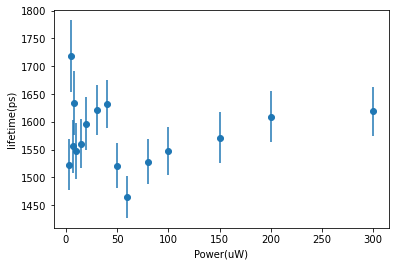

In [22]:
plt.errorbar(powers,t_out,yerr=t_uncs,fmt='o')
plt.xlabel('Power(uW)')
plt.ylabel('lifetime(ps)')


In [14]:
def expo(x,a,T,c):
    return a*np.exp(x*(-1/T))+c

In [15]:
def double_exp(t, a1, t1, a2, t2, c):
    return a1*np.exp(-t/t1) + a2*np.exp(-t/t2) + c

In [16]:
p0 = [1000, 1000,1]  # Initial guess for the parameters
params, unc = curve_fit(expo, t, counts, p0=p0)
uncs = np.sqrt(np.diag(unc))
print(params)
print(uncs)


[4.47054738e+08 1.34704328e+03 1.13099870e+01]
[1.64701074e+08 3.36195194e+01 9.12838970e-01]


In [200]:
i=0

C:\Users\hamps\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


300.0 1403.1312100953733


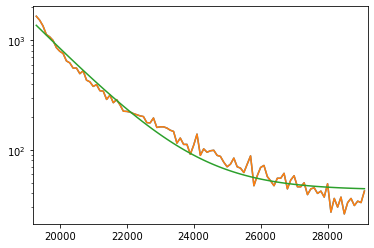

In [214]:
file = os.listdir()[6]
df = pd.read_csv(file, delim_whitespace=True)
xmin = df.iloc[df.iloc[:,1].idxmax(),0]
xmax =xmin+10000
t = df.iloc[:,0]
mask = (t<xmax)&(t>xmin)
t=t[mask]
counts = df.iloc[:,1][mask]
plt.xlim(xmin,xmax)
#plt.ylim(2,700)
plt.semilogy(t,counts)
p0 = [5000, 300,50,5000,2]  # Initial guess for the parameters
params, unc = curve_fit(double_exp, t, counts,sigma=np.sqrt(counts), p0=p0)
uncs = np.sqrt(np.diag(unc))
print(params[1],params[3])
plt.plot(t,counts)
plt.plot(t,double_exp(t,params[0],params[1],params[2],params[3],params[4]))
i+=1

In [73]:
df.iloc[:,1].idxmax()

196

In [85]:
a=df.iloc[df.iloc[:,1].idxmax(),0]

In [239]:
df

,Time (ps),Counts per bin
0,0,6
1,100,2
2,200,2
3,300,6
4,400,6
...,...,...
995,99500,1
996,99600,3
997,99700,4
998,99800,3


In [85]:
os.listdir()

['BG_529nm_60s.dat',
 'BG_529nm_60s.phu',
 'IRF_450nm_60s.dat',
 'IRF_450nm_60s.phu',
 'PL_527nm_100uW_60s.dat',
 'PL_527nm_100uW_60s.phu',
 'PL_529nm_100uW_60s.dat',
 'PL_529nm_100uW_60s.phu',
 'PL_529nm_60s_with laser.dat',
 'PL_529nm_60s_with laser.phu',
 'PL_531nm_100uW_60s.dat',
 'PL_531nm_100uW_60s.phu',
 'PL_532nm_100uW_60s.dat',
 'PL_532nm_100uW_60s.phu']

IndexError: single positional indexer is out-of-bounds

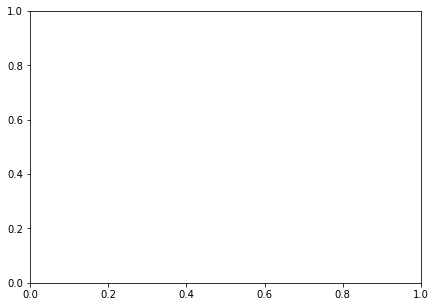

In [92]:
fig, axs = plt.subplots(1, 1, figsize=(7,5))
file = os.listdir()[6]
df = pd.read_csv(file, delim_whitespace=True, comment='#')
#offset = df.iloc[df.iloc[:,1].idxmax(),0]
offset = 0
t = df.iloc[:,0]
xmin = df.iloc[df.iloc[:,1].idxmax(),0]+300
xmax =xmin+15000
mask = (t<xmax)&(t>xmin)
t_off = t - offset
t_u=t[mask]-offset
counts = df.iloc[:,1][mask]
p0 = [1000, 1000,3]
params, unc = curve_fit(expo, t_u, counts, p0=p0,sigma=np.sqrt(counts))
uncs = np.sqrt(np.diag(unc))
axs.semilogy(t_off, df.iloc[:,1], label='signal')
axs.semilogy(t_u,expo(t_u,*params), label = 'decay fit')
axs.set_xlim(-2500, 13000)
axs.set_ylim(0.5, 3000)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
textstr1 = '\n'.join((
    r'FitParams:',
    r'$A=%.2f$' % (params[0],),
    r'$T=%.2f ps$' % (params[1],),
    r'$C=%.2f$' % (params[2],)))
axs.text(0.7, 0.95, textstr1, transform=axs.transAxes, fontsize=20, verticalalignment='top', bbox=props)
axs.set_xlabel('Time (ps)')
axs.set_ylabel('Time resolved PL intensity (AU)')
axs.legend(loc = 'upper left')


In [205]:
powers = [3,5,6.7,8,10,15,20,30,40,50,60,80,100,150,200,300]

In [225]:
file  = os.listdir()[0]
print(file)
files = [os.listdir()[0], os.listdir()[-4]]
p = [3,100]

Histogram_2023-03-24_184502.txt


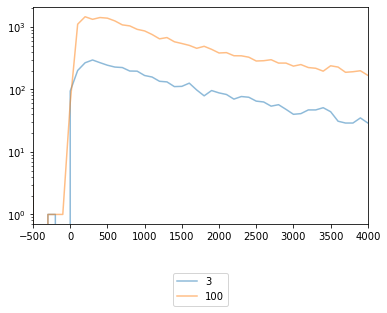

In [227]:
for i, file in enumerate(files):
    df = pd.read_csv(file, delim_whitespace=True, comment='#')
    t = df.iloc[:,0]
    c = df.iloc[:,1]
    off = t.iloc[min(c[c>20].index)]
    t=t-off
    xmin = 0-500
    xmax = 4000
    plt.xlim(xmin,xmax)
    plt.semilogy(t,c, alpha=0.5, label = p[i])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2))
plt.show()

In [215]:
t.imin(c[c>10].index)

189

In [185]:

df = pd.read_csv(file, delim_whitespace=True, comment='#')
df = df[3:]
df.columns = ['counts']
df['times (ns)'] = df.index*0.025
t = df.iloc[:,1]
c = df.iloc[:,0]
off = t.iloc[c.idxmax()]
t = t - off
xmin = 0+0.08
xmax = 2.1
mask = (t<xmax)&(t>xmin)
p0 = [10000, 1,0]
params, unc = curve_fit(expo, t[mask], c[mask], p0=p0,sigma=np.sqrt(c[mask]))
plt.plot(t[mask],expo(t[mask],*params), label = 'decay fit', linewidth = 2.5)
plt.scatter(t, c, label='data', alpha=0.3, s=20, color='red')
plt.xlim(-1,4)
plt.xlabel('Time (ns)')
plt.ylabel('Time-resolved PL intensity (a.u)')
uncs = np.sqrt(np.diag(unc))
textstr1 = '\n'.join((
    r'Fit:',
    r'$\tau=%.2f ns$' % (params[1]),
    r'$\pm %.3f ns$' % (uncs[1])))
plt.text(0.5, 0.5, textstr1, transform=axs.transAxes, fontsize=15, verticalalignment='top', bbox=props)
plt.legend()

#plt.title(file)

ValueError: Length mismatch: Expected axis has 2 elements, new values have 1 elements

In [157]:
uncs


array([2.46677592e+02, 3.77905421e-03, 6.86126727e+00])

,counts,times (ns)
3,11.0,0.075
4,12.0,0.100
5,9.0,0.125
6,10.0,0.150
7,13.0,0.175
...,...,...
32766,0.0,819.150
32767,0.0,819.175
32768,0.0,819.200
32769,0.0,819.225
